# :oncoming_automobile: Car Price Analytics
## 04 Feature Engineering

|Field|Description|
|-----|-----------|
|**Author:** |Robert Steven Elliott|
|**Course:** |Code Institute – Data Analytics with AI Bootcamp|
|**Project Type:** |Hakathon 1|
|**Team Name:** | tbc |
|**Date:** | November 2025| 

---
### Objectives
- Create new features that provide deeper analytical insight.
    - Bin compression ratio from result of initial EDA
    - Price per horsepower
    - power_to_weight_ratio
    - engine_efficiency
    - avg_mpg
    - price_per_mpg

- Save the enriched dataset for visualisation and analysis.

### Inputs
- data/cleaned/car_price.csv

###Outputs

- data/processed/car_price.csv

### Additional Comments
Ensure this notebook is run after 02_data_cleaning_and_transformation.ipynb.

## Ingnore Warnings

This project uses alot of old library versions so we will turn of future warnings

In [1]:
import warnings # import warnings module
warnings.simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

---

## Change Working Directory


In [2]:
import os # import os module
PROJECT_ROOT = os.path.join(os.getcwd(), "..") # define project root directory
os.chdir(PROJECT_ROOT) # change working directory to project root
print("✅ Working directory set to project root:", os.getcwd()) # print confirmation message

✅ Working directory set to project root: /home/robert/Projects/Car-Price-Analytics


---

## Import Libraries and Dataset


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

df = pd.read_csv("data/cleaned/car_prices.csv")
print("✅ Data loaded successfully.")
df.head()

✅ Data loaded successfully.


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,manufacturer,model
0,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,petrol,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,petrol,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,petrol,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## Add Features

### Compression Ratio

Since `compressionratio` was bimodal and had a large range we will create a new categorical column with the values `low`, `Standard` and `High`.

The compression ratios for modern cars are:

| Bracket  | Value   |
|----------|---------|
| Low      |  < 10   |
| Standard | 10 - 12 |
| High     |   > 12  |

In [ ]:
# create a new categorical column 'compressionratio_bin' based on 'compressionratio'

min_val = df['compressionratio'].min() # get minimum value
max_val = df['compressionratio'].max() # get maximum value

bin_edges = [min_val, 9, 12, max_val]  # define bin edges

df['compressionratio_bin'] = pd.cut(
    df['compressionratio'], # column to bin
    bins=bin_edges,  # number of bins
    labels=['Low', 'Standard', 'High'], # labels for the bins
    include_lowest=True
) 

In [43]:
df[['compressionratio', 'compressionratio_bin']].head()

,compressionratio,compressionratio_bin
0,9.0,Low
1,9.0,Low
2,9.0,Low
3,10.0,Standard
4,8.0,Low


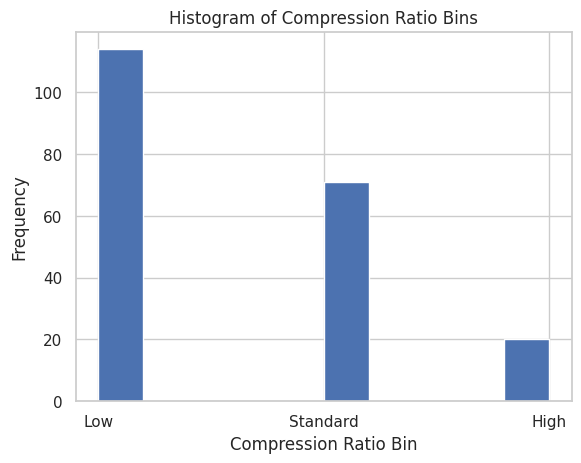

In [41]:
df['compressionratio_bin'].hist()
plt.title('Histogram of Compression Ratio Bins')
plt.xlabel('Compression Ratio Bin')
plt.ylabel('Frequency')
plt.show()

### Price Per Horsepower (`price_per_hp`)

This is calculated by 

$$
\text{price per hp} = \frac{\text{price}}{\text{horsepower}}
$$

In [ ]:
df['price_per_hp'] = df['price'] / df['horsepower'] # calculate price per horsepower
df[['price', 'horsepower', 'price_per_hp']].head() # display relevant columns

,price,horsepower,price_per_hp
0,13495.0,111,121.576577
1,16500.0,111,148.648649
2,16500.0,154,107.142857
3,13950.0,102,136.764706
4,17450.0,115,151.739130


### Power to Weight Ration (`power_to_weight_ratio`)

This is calculated by:

$$
\text{power to weight ratio} = \frac{\text{horsepower}}{\text{curb weight}}
$$

In [ ]:
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight'] # calculate power to weight ratio
df[['horsepower', 'curbweight', 'power_to_weight_ratio']].head() # display relevant columns

,horsepower,curbweight,power_to_weight_ratio
0,111,2548,0.043564
1,111,2548,0.043564
2,154,2823,0.054552
3,102,2337,0.043646
4,115,2824,0.040722


### Engine Efficience (`engine_efficiency`)

This is calculated by:

$$
\text{Engine Efficiency} = \frac{\text{horsepower}}{\text{engine size}}
$$

In [46]:
df['engine_efficiency'] = df['horsepower'] / df['enginesize'] # calculate engine efficiency
df[['horsepower', 'enginesize', 'engine_efficiency']].head() # display relevant columns

,horsepower,enginesize,engine_efficiency
0,111,130,0.853846
1,111,130,0.853846
2,154,152,1.013158
3,102,109,0.935780
4,115,136,0.845588


## Average MPG (`avg_mpg`)

This is calculated by:
$$
\text{Average MPG} = \frac{(\text{City MPG} + \text{Highway MPG})}{2}
$$

In [47]:
df['avg_mpg'] = (df['citympg'] + df['highwaympg']) / 2 # calculate average mpg
df[['citympg', 'highwaympg', 'avg_mpg']].head() # display relevant columns

,citympg,highwaympg,avg_mpg
0,21,27,24.0
1,21,27,24.0
2,19,26,22.5
3,24,30,27.0
4,18,22,20.0


### Price Per MPG (`price_per_mpg`)

This is calculated by:

$$
\text{Price Per MPG} = \frac{Price}{Average MPG}
$$

In [48]:
df['price_per_mpg'] = df['price'] / df['avg_mpg'] # calculate price per mpg
df[['price', 'avg_mpg', 'price_per_mpg']].head() # display relevant columns 

,price,avg_mpg,price_per_mpg
0,13495.0,24.0,562.291667
1,16500.0,24.0,687.500000
2,16500.0,22.5,733.333333
3,13950.0,27.0,516.666667
4,17450.0,20.0,872.500000


## Save Final Dataset to CSV

In [49]:
os.makedirs("data/final", exist_ok=True) # Create the cleaned data directory if it doesn't exist
output_path = "data/final/car_prices.csv" # Define the output path for the cleaned dataset
df.to_csv(output_path, index=False) # Save the cleaned dataset
print(f"📁 Final dataset saved to: {output_path}") # Print confirmation message

📁 Final dataset saved to: data/final/car_prices.csv
